In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# define the data point
x = np.array([1, 2, -1, -2]) # feature value 
y = np.array([1, 1, 0, 0]) # coreesponding labels

In [45]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [46]:
def cross_entropy_loss(x, y, theta, theta0):
    z = theta * x + theta0
    p = sigmoid(z)  # Get predicted probabilities
    print(f"Predicted probabilities: {p}")  # Debugging line
    p = np.clip(p, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    print(f"Loss: {loss}")  # Debugging line
    return loss

In [39]:
# # cross entropy loss function 
# def cross_entropy_loss(x,y, theta ,theta0):
#     z = theta * x + theta0
#     p = sigmoid(z)
     
#     return -np.sum(y*np.log(p + 1e-15) + (1-y)* np.exp(1-p + 1e-15))

In [47]:
# values of theta and theta0 to use 
theta_values = [1,-1,2,-2]  # diffferent thetas
theta0_values = [0,1,-1,2] # corresponding theta0s

Predicted probabilities: [0.73105858 0.88079708 0.26894142 0.11920292]
Loss: 0.2200948492805977
Predicted probabilities: [0.5        0.26894142 0.88079708 0.95257413]
Loss: 1.795481057673721
Predicted probabilities: [0.73105858 0.95257413 0.04742587 0.00669285]
Loss: 0.10428793478870618
Predicted probabilities: [0.5        0.11920292 0.98201379 0.99752738]
Loss: 3.2101752011646267


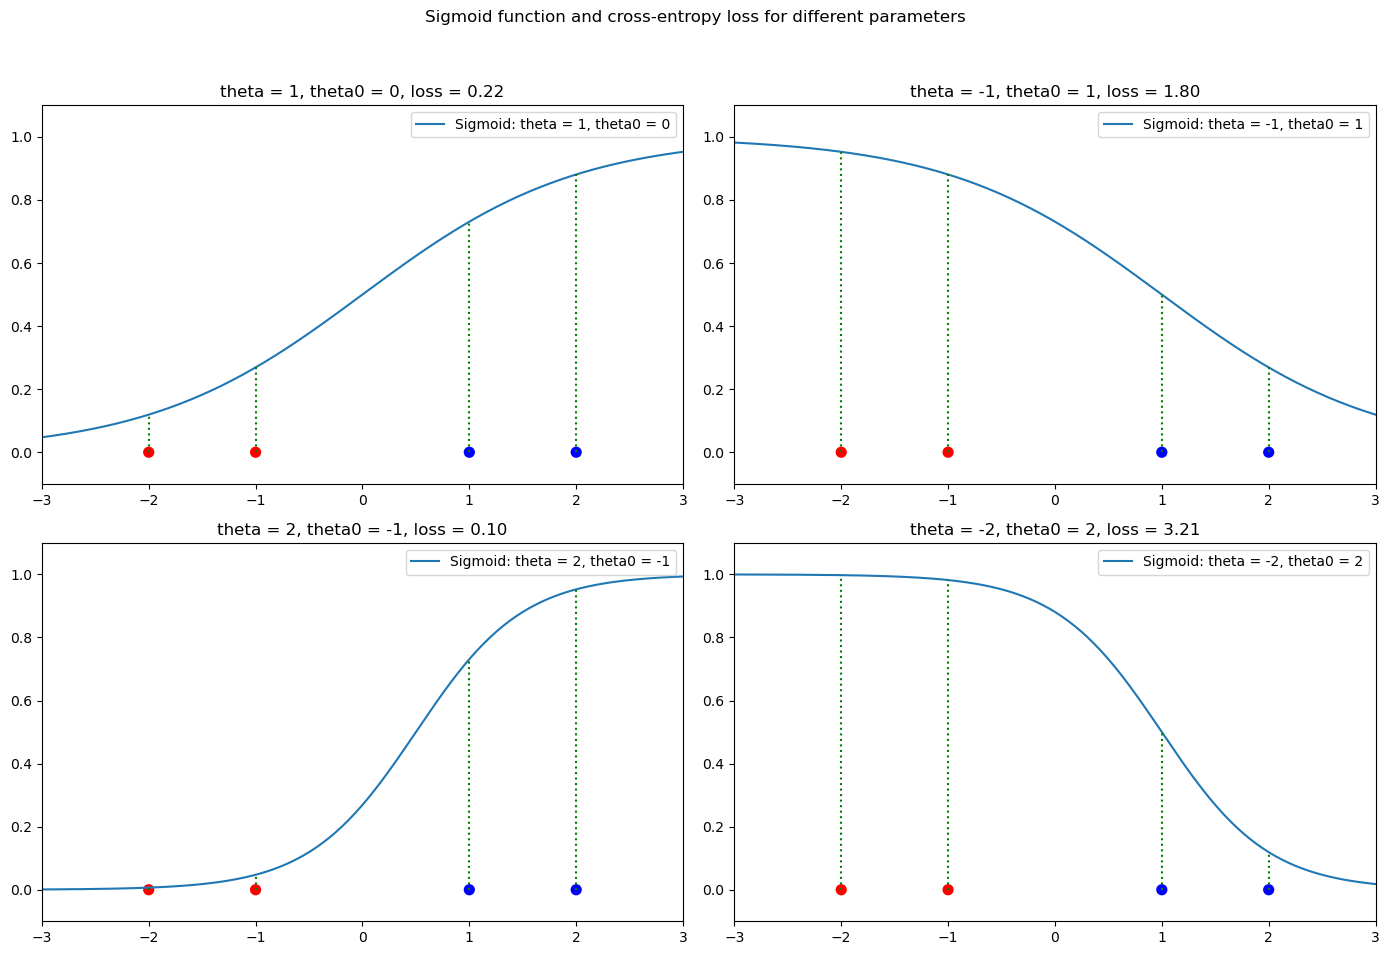

In [48]:
# plot setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Sigmoid function and cross-entropy loss for different parameters")

for ax, theta, theta0 in zip(axes.flatten(), theta_values, theta0_values):
    # generate a range of x values for plotting the sigmoid 
    x_range = np.linspace(-3, 3, 300)
    z = theta * x_range + theta0
    p = sigmoid(z)
    
    # plot the sigmoid curve
    ax.plot(x_range, p, label=f"Sigmoid: theta = {theta}, theta0 = {theta0}")
    
    # highlight data point on x-axis
    ax.scatter(x, np.zeros_like(x), c=['blue' if label == 1 else 'red' for label in y], s=50) 
    ax.vlines(x, 0, sigmoid(theta * x + theta0), color='green', linestyle='dotted')
    
    # calculate and display the loss
    loss = cross_entropy_loss(x, y, theta, theta0)
    ax.title.set_text(f"theta = {theta}, theta0 = {theta0}, loss = {loss:.2f}")
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-0.1, 1.1]) 
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()